In [1]:
%reset -fs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
linear_reg = LinearRegression()
lasso_cv = LassoCV()
lasso = Lasso()
ridge_cv = RidgeCV()
ridge_reg = Ridge()
elastic_cv = ElasticNetCV()
elastic_net = ElasticNet()
bayesian_ridge = BayesianRidge()
log_regression = LogisticRegression()
sgd_reg = SGDRegressor()
scaler = StandardScaler()

In [3]:
df = pd.read_csv('modeling_dataset.csv', index_col=[0,1]);df

Age   GS  MP_x  FG_x  FGA_x  2P_x  2PA_x  3P_x  \
Name            Date                                                          
 Bogdan         2021-10-21  29.0  1.0  26.0   4.0    8.0   1.0    3.0   3.0   
                2021-10-23  29.0  1.0  27.0   2.0    7.0   1.0    4.0   1.0   
                2021-10-25  29.0  1.0  25.0   5.0    9.0   3.0    3.0   2.0   
                2021-10-27  29.0  1.0  31.0   4.0   12.0   2.0    6.0   2.0   
                2021-10-28  29.0  1.0  34.0   6.0   11.0   5.0    7.0   1.0   
...                          ...  ...   ...   ...    ...   ...    ...   ...   
Ziaire Williams 2021-11-22  20.0  0.0  29.0   3.0    6.0   2.0    3.0   1.0   
                2022-01-09  20.0  1.0  27.0   4.0    9.0   3.0    5.0   1.0   
                2022-01-17  20.0  1.0  18.0   0.0    4.0   0.0    1.0   0.0   
                2022-01-19  20.0  1.0  33.0   4.0   11.0   3.0    4.0   1.0   
                2022-01-21  20.0  1.0  31.0   6.0    8.0   4.0    5.0   2.0   

                            3PA_x  FT_x  FTA_x    TS%  ORB  DRB  TRB  AST  \
Name            Date                                                        
 Bogdan         2021-10-21    5.0   0.0    0.0  0.688  0.0  3.0  3.0  2.0   
                2021-10-23    3.0   0.0    0.0  0.357  0.0  2.0  2.0  2.0   
                2021-10-25    6.0   2.0    2.0  0.709  1.0  2.0  3.0  1.0   
                2021-10-27    6.0   2.0    2.0  0.466  1.0  2.0  3.0  3.0   
                2021-10-28    4.0   1.0    1.0  0.612  0.0  6.0  6.0  4.0   
...                           ...   ...    ...    ...  ...  ...  ...  ...   
Ziaire Williams 2021-11-22    3.0   1.0    2.0  0.581  0.0  4.0  4.0  1.0   
                2022-01-09    4.0   0.0    0.0  0.500  0.0  2.0  2.0  3.0   
                2022-01-17    3.0   2.0    2.0  0.205  0.0  3.0  3.0  1.0   
                2022-01-19    7.0   1.0    1.0  0.437  0.0  1.0  1.0  1.0   
                2022-01-21    3.0   3.0    4.0  0.871  1.0  4.0  5.0  0.0   

                            STL  BLK  TOV   PF  PTS_x  GmSc   BPM  FG_y  \
Name            Date                                                      
 Bogdan         2021-10-21  2.0  0.0  2.0  3.0   11.0   8.1   2.8  45.0   
                2021-10-23  0.0  0.0  0.0  2.0    5.0   2.1  -5.6  38.0   
                2021-10-25  0.0  0.0  0.0  1.0   14.0  11.3   1.9  46.0   
                2021-10-27  0.0  1.0  0.0  2.0   12.0   8.5   0.3  40.0   
                2021-10-28  1.0  0.0  0.0  5.0   14.0  12.3   0.1  48.0   
...                         ...  ...  ...  ...    ...   ...   ...   ...   
Ziaire Williams 2021-11-22  0.0  0.0  0.0  2.0    8.0   5.7  -4.7  42.0   
                2022-01-09  1.0  0.0  1.0  4.0    9.0   5.4  -7.3  47.0   
                2022-01-17  0.0  0.0  2.0  2.0    2.0  -2.0 -17.9  47.0   
                2022-01-19  1.0  0.0  0.0  1.0   10.0   5.5  -6.3  44.0   
                2022-01-21  2.0  1.0  0.0  4.0   17.0  16.4   8.1  43.0   

                            FGA_y  2P_y  2PA_y  3P_y  3PA_y  FT_y  FTA_y  \
Name            Date                                                       
 Bogdan         2021-10-21   94.0  30.0   59.0  15.0   35.0   8.0    9.0   
                2021-10-23   99.0  28.0   65.0  10.0   34.0   9.0   15.0   
                2021-10-25   90.0  34.0   58.0  12.0   32.0  18.0   21.0   
                2021-10-27   96.0  32.0   66.0   8.0   30.0  14.0   17.0   
                2021-10-28   88.0  42.0   67.0   6.0   21.0   9.0   14.0   
...                           ...   ...    ...   ...    ...   ...    ...   
Ziaire Williams 2021-11-22   95.0  29.0   60.0  13.0   35.0  22.0   27.0   
                2022-01-09   86.0  36.0   56.0  11.0   30.0  22.0   32.0   
                2022-01-17   92.0  37.0   67.0  10.0   25.0  15.0   20.0   
                2022-01-19  106.0  35.0   66.0   9.0   40.0  17.0   25.0   
                2022-01-21   82.0  32.0   57.0  11.0   25.0  25.0   40.0   

                            PTS_y 

In [4]:
df2 = df.reset_index();df2

Name        Date   Age   GS  MP_x  FG_x  FGA_x  2P_x  2PA_x  \
0              Bogdan  2021-10-21  29.0  1.0  26.0   4.0    8.0   1.0    3.0   
1              Bogdan  2021-10-23  29.0  1.0  27.0   2.0    7.0   1.0    4.0   
2              Bogdan  2021-10-25  29.0  1.0  25.0   5.0    9.0   3.0    3.0   
3              Bogdan  2021-10-27  29.0  1.0  31.0   4.0   12.0   2.0    6.0   
4              Bogdan  2021-10-28  29.0  1.0  34.0   6.0   11.0   5.0    7.0   
...               ...         ...   ...  ...   ...   ...    ...   ...    ...   
8671  Ziaire Williams  2021-11-22  20.0  0.0  29.0   3.0    6.0   2.0    3.0   
8672  Ziaire Williams  2022-01-09  20.0  1.0  27.0   4.0    9.0   3.0    5.0   
8673  Ziaire Williams  2022-01-17  20.0  1.0  18.0   0.0    4.0   0.0    1.0   
8674  Ziaire Williams  2022-01-19  20.0  1.0  33.0   4.0   11.0   3.0    4.0   
8675  Ziaire Williams  2022-01-21  20.0  1.0  31.0   6.0    8.0   4.0    5.0   

      3P_x  3PA_x  FT_x  FTA_x    TS%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
0      3.0    5.0   0.0    0.0  0.688  0.0  3.0  3.0  2.0  2.0  0.0  2.0  3.0   
1      1.0    3.0   0.0    0.0  0.357  0.0  2.0  2.0  2.0  0.0  0.0  0.0  2.0   
2      2.0    6.0   2.0    2.0  0.709  1.0  2.0  3.0  1.0  0.0  0.0  0.0  1.0   
3      2.0    6.0   2.0    2.0  0.466  1.0  2.0  3.0  3.0  0.0  1.0  0.0  2.0   
4      1.0    4.0   1.0    1.0  0.612  0.0  6.0  6.0  4.0  1.0  0.0  0.0  5.0   
...    ...    ...   ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
8671   1.0    3.0   1.0    2.0  0.581  0.0  4.0  4.0  1.0  0.0  0.0  0.0  2.0   
8672   1.0    4.0   0.0    0.0  0.500  0.0  2.0  2.0  3.0  1.0  0.0  1.0  4.0   
8673   0.0    3.0   2.0    2.0  0.205  0.0  3.0  3.0  1.0  0.0  0.0  2.0  2.0   
8674   1.0    7.0   1.0    1.0  0.437  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
8675   2.0    3.0   3.0    4.0  0.871  1.0  4.0  5.0  0.0  2.0  1.0  0.0  4.0   

      PTS_x  GmSc   BPM  FG_y  FGA_y  2P_y  2PA_y  3P_y  3PA_y  FT_y  FTA_y  \
0      11.0   8.1   2.8  45.0   94.0  30.0   59.0  15.0   35.0   8.0    9.0   
1       5.0   2.1  -5.6  38.0   99.0  28.0   65.0  10.0   34.0   9.0   15.0   
2      14.0  11.3   1.9  46.0   90.0  34.0   58.0  12.0   32.0  18.0   21.0   
3      12.0   8.5   0.3  40.0   96.0  32.0   66.0   8.0   30.0  14.0   17.0   
4      14.0  12.3   0.1  48.0   88.0  42.0   67.0   6.0   21.0   9.0   14.0   
...     ...   ...   ...   ...    ...   ...    ...   ...    ...   ...    ...   
8671    8.0   5.7  -4.7  42.0   95.0  29.0   60.0  13.0   35.0  22.0   27.0   
8672    9.0   5.4  -7.3  47.0   86.0  36.0   56.0  11.0   30.0  22.0   32.0   
8673    2.0  -2.0 -17.9  47.0   92.0  37.0   67.0  10.0   25.0  15.0   20.0   
8674   10.0   5.5  -6.3  44.0  106.0  35.0   66.0   9.0   40.0  17.0   25.0   
8675   17.0  16.4   8.1  43.0   82.0  32.0   57.0  11.0   25.0  25.0   40.0   

      PTS_y  FG.1  FGA.1  2P.1  2PA.1  3P.1  3PA.1  FT.1  FTA.1  PTS.1  \
0     113.0  31.0   93.0  18.0   50.0  13.0   43.0  12.0   13.0   87.0   
1      95.0  37.0   89.0  30.0   61.0   7.0   28.0  20.0   27.0  101.0   
2     122.0  40.0   91.0  31.0   58.0   9.0   33.0  15.0   18.0  104.0   
3     102.0  40.0   93.0  29.0   57.0  11.0   36.0   8.0    9.0   99.0   
4     111.0  46.0   99.0  33.0   65.0  13.0   34.0  17.0   21.0  122.0   
...     ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   
8671  119.0  41.0   87.0  24.0   44.0  17.0   43.0  19.0   25.0  118.0   
8672  127.0  45.0   97.0  31.0   64.0  14.0   33.0  15.0   19.0  119.0   
8673  119.0  40.0   92.0  27.0   61.0  13.0   31.0  13.0   15.0  106.0   
8674  114.0  46.0   97.0  33.0   60.0  13.0   37.0  21.0   22.0  126.0   
8675  122.0  43.0   91.0  30.0   59.0  13.0   32.0  19.0   23.0  118.0   

      days_rest  target_pts  rolling_avg  rolling_3pa_avg  mpg_rolling  \
0      2.310504         5.0         11.0         5.000000        26.00   
1      2.000000        14.0          8.0         4.000000        26.50   
2      2.000000        

In [5]:
X, y = df2.drop(columns=['Name', 'Date','target_pts']), df.target_pts;

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=2)

In [8]:
X_train_scaled = scaler.fit_transform(X_train.values)

In [9]:
X_val_scaled = scaler.fit_transform(X_val.values)

In [10]:
alphavec = 10**np.linspace(-2,2,200)

lasso_cv = LassoCV(alphas = alphavec, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [11]:
lasso_cv.alpha_

0.12750512407130135

In [12]:
for col, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{col:<16}: {coef:>12,.7f}")

Age             :   -0.0566288
GS              :    0.0000000
MP_x            :   -0.0000000
FG_x            :    0.0000000
FGA_x           :    0.0000000
2P_x            :    0.0000000
2PA_x           :    0.0000000
3P_x            :   -0.0000000
3PA_x           :   -0.0000000
FT_x            :    0.0000000
FTA_x           :    0.1380977
TS%             :   -0.0000000
ORB             :   -0.0000000
DRB             :    0.0000000
TRB             :    0.0000000
AST             :    0.0000000
STL             :    0.0000000
BLK             :    0.0000000
TOV             :    0.0000000
PF              :   -0.0000000
PTS_x           :    0.0000000
GmSc            :    0.0000000
BPM             :   -0.0000000
FG_y            :   -0.0000000
FGA_y           :   -0.0000000
2P_y            :   -0.0000000
2PA_y           :   -0.0000000
3P_y            :    0.0000000
3PA_y           :    0.0000000
FT_y            :   -0.0000000
FTA_y           :   -0.0000000
PTS_y           :   -0.0000000
FG.1    

In [13]:
print('R2 for LassoCV Model on train set: ' + str(lasso_cv.score(X_train_scaled, y_train)))

R2 for LassoCV Model on train set: 0.46011267094191577


In [14]:
val_set_preds = lasso_cv.predict(X_val_scaled)

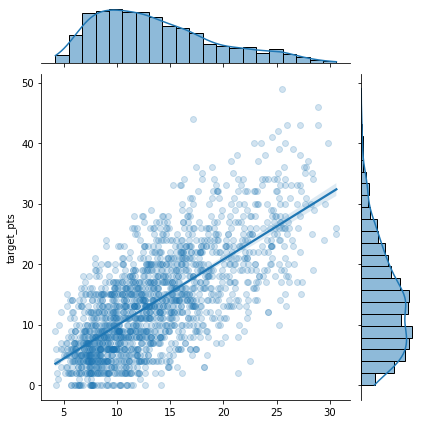

In [15]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [16]:
print('R2 for LassoCV Model on validation set: ' + str(lasso_cv.score(X_val_scaled, y_val)))

R2 for LassoCV Model on validation set: 0.4888816649059107


In [17]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for LassoCV model on validation set: ' + str(mae))

Mean absolute error for LassoCV model on validation set: 4.851459462933159


In [18]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for LassoCV model on validation set: ' + str(rmse))

Root mean squared error for LassoCV model on validation set: 6.108853755162303


In [19]:
df3 = df2[['target_pts', '2PA_x', 'FT_x', 'DRB', 'AST', 'rolling_2pa', 'line', 'projection', 'Age', 'FG_y', 'rolling_opp_fga', 'moneyline', 'game_result_W', 'Team_CHA', 'Team_LAC', 'Team_MIA', 'Team_MIN', 'Team_ORL', 'Position_F-G', 'opponent_ATL', 'opponent_BOS', 'opponent_CLE', 'opponent_GSW', 'opponent_LAL', 'opponent_UTH', 'opponent_TOR']]; df3

target_pts  2PA_x  FT_x  DRB  AST  rolling_2pa  line  projection   Age  \
0            5.0    3.0   0.0  3.0  2.0     3.000000  14.5       15.29  29.0   
1           14.0    4.0   0.0  2.0  2.0     3.500000  15.5       12.85  29.0   
2           12.0    3.0   2.0  2.0  1.0     3.333333  12.5       13.70  29.0   
3           14.0    6.0   2.0  2.0  3.0     4.000000  12.5       16.72  29.0   
4           13.0    7.0   1.0  6.0  4.0     4.600000  12.5       15.71  29.0   
...          ...    ...   ...  ...  ...          ...   ...         ...   ...   
8671         9.0    3.0   1.0  4.0  1.0     2.600000   8.5        8.00  20.0   
8672         2.0    5.0   0.0  2.0  3.0     3.600000   8.5        6.11  20.0   
8673        10.0    1.0   2.0  3.0  1.0     3.400000   9.5        8.70  20.0   
8674        17.0    4.0   1.0  1.0  1.0     3.200000   9.5        8.90  20.0   
8675         9.0    5.0   3.0  4.0  0.0     3.200000  10.5        8.60  20.0   

      FG_y  rolling_opp_fga  moneyline  game_result_W  Team_CHA  Team_LAC  \
0     45.0             93.0     -115.0              0         0         0   
1     38.0             91.0     -115.0              1         0         0   
2     46.0             91.0     -125.0              1         0         0   
3     40.0             91.5     -105.0              0         0         0   
4     48.0             93.0     -113.0              0         0         0   
...    ...              ...        ...            ...       ...       ...   
8671  42.0             88.4     -115.0              1         0         0   
8672  47.0             92.0     -105.0              1         0         0   
8673  47.0             91.6     -103.0              0         0         0   
8674  44.0             91.6      100.0              1         0         0   
8675  43.0             93.4     -105.0              0         0         0   

      Team_MIA  Team_MIN  Team_ORL  Position_F-G  opponent_ATL  opponent_BOS  \
0            0         0         0             0             0             0   
1            0         0         0             0             0             0   
2            0         0         0             0             0             0   
3            0         0         0             0             0             0   
4            0         0         0             0             0             0   
...        ...       ...       ...           ...           ...           ...   
8671         0         0         0             0             0             0   
8672         0         0         0             0             0             0   
8673         0         0         0             0             0             0   
8674         0         0         0             0             0             0   
8675         0         0         0             0             0             0   

      opponent_CLE  opponent_GSW  opponent_LAL  opponent_UTH  opponent_TOR  
0                1             0             0             0             0  
1                0             0             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
8671             0             0             1             0             0  
8672             0             0             0             0             0  
8673             0             0             0             0             0  
8674             0             0             0             0             0  
8675             0             0             0             0             0  

[8676 rows x 26 columns]

In [20]:
numeric_df = df3.loc[:,['target_pts', '2PA_x', 'FT_x', 'DRB', 'AST', 'rolling_2pa', 'line', 'projection', 'Age', 'FG_y', 'rolling_opp_fga', 'moneyline']]

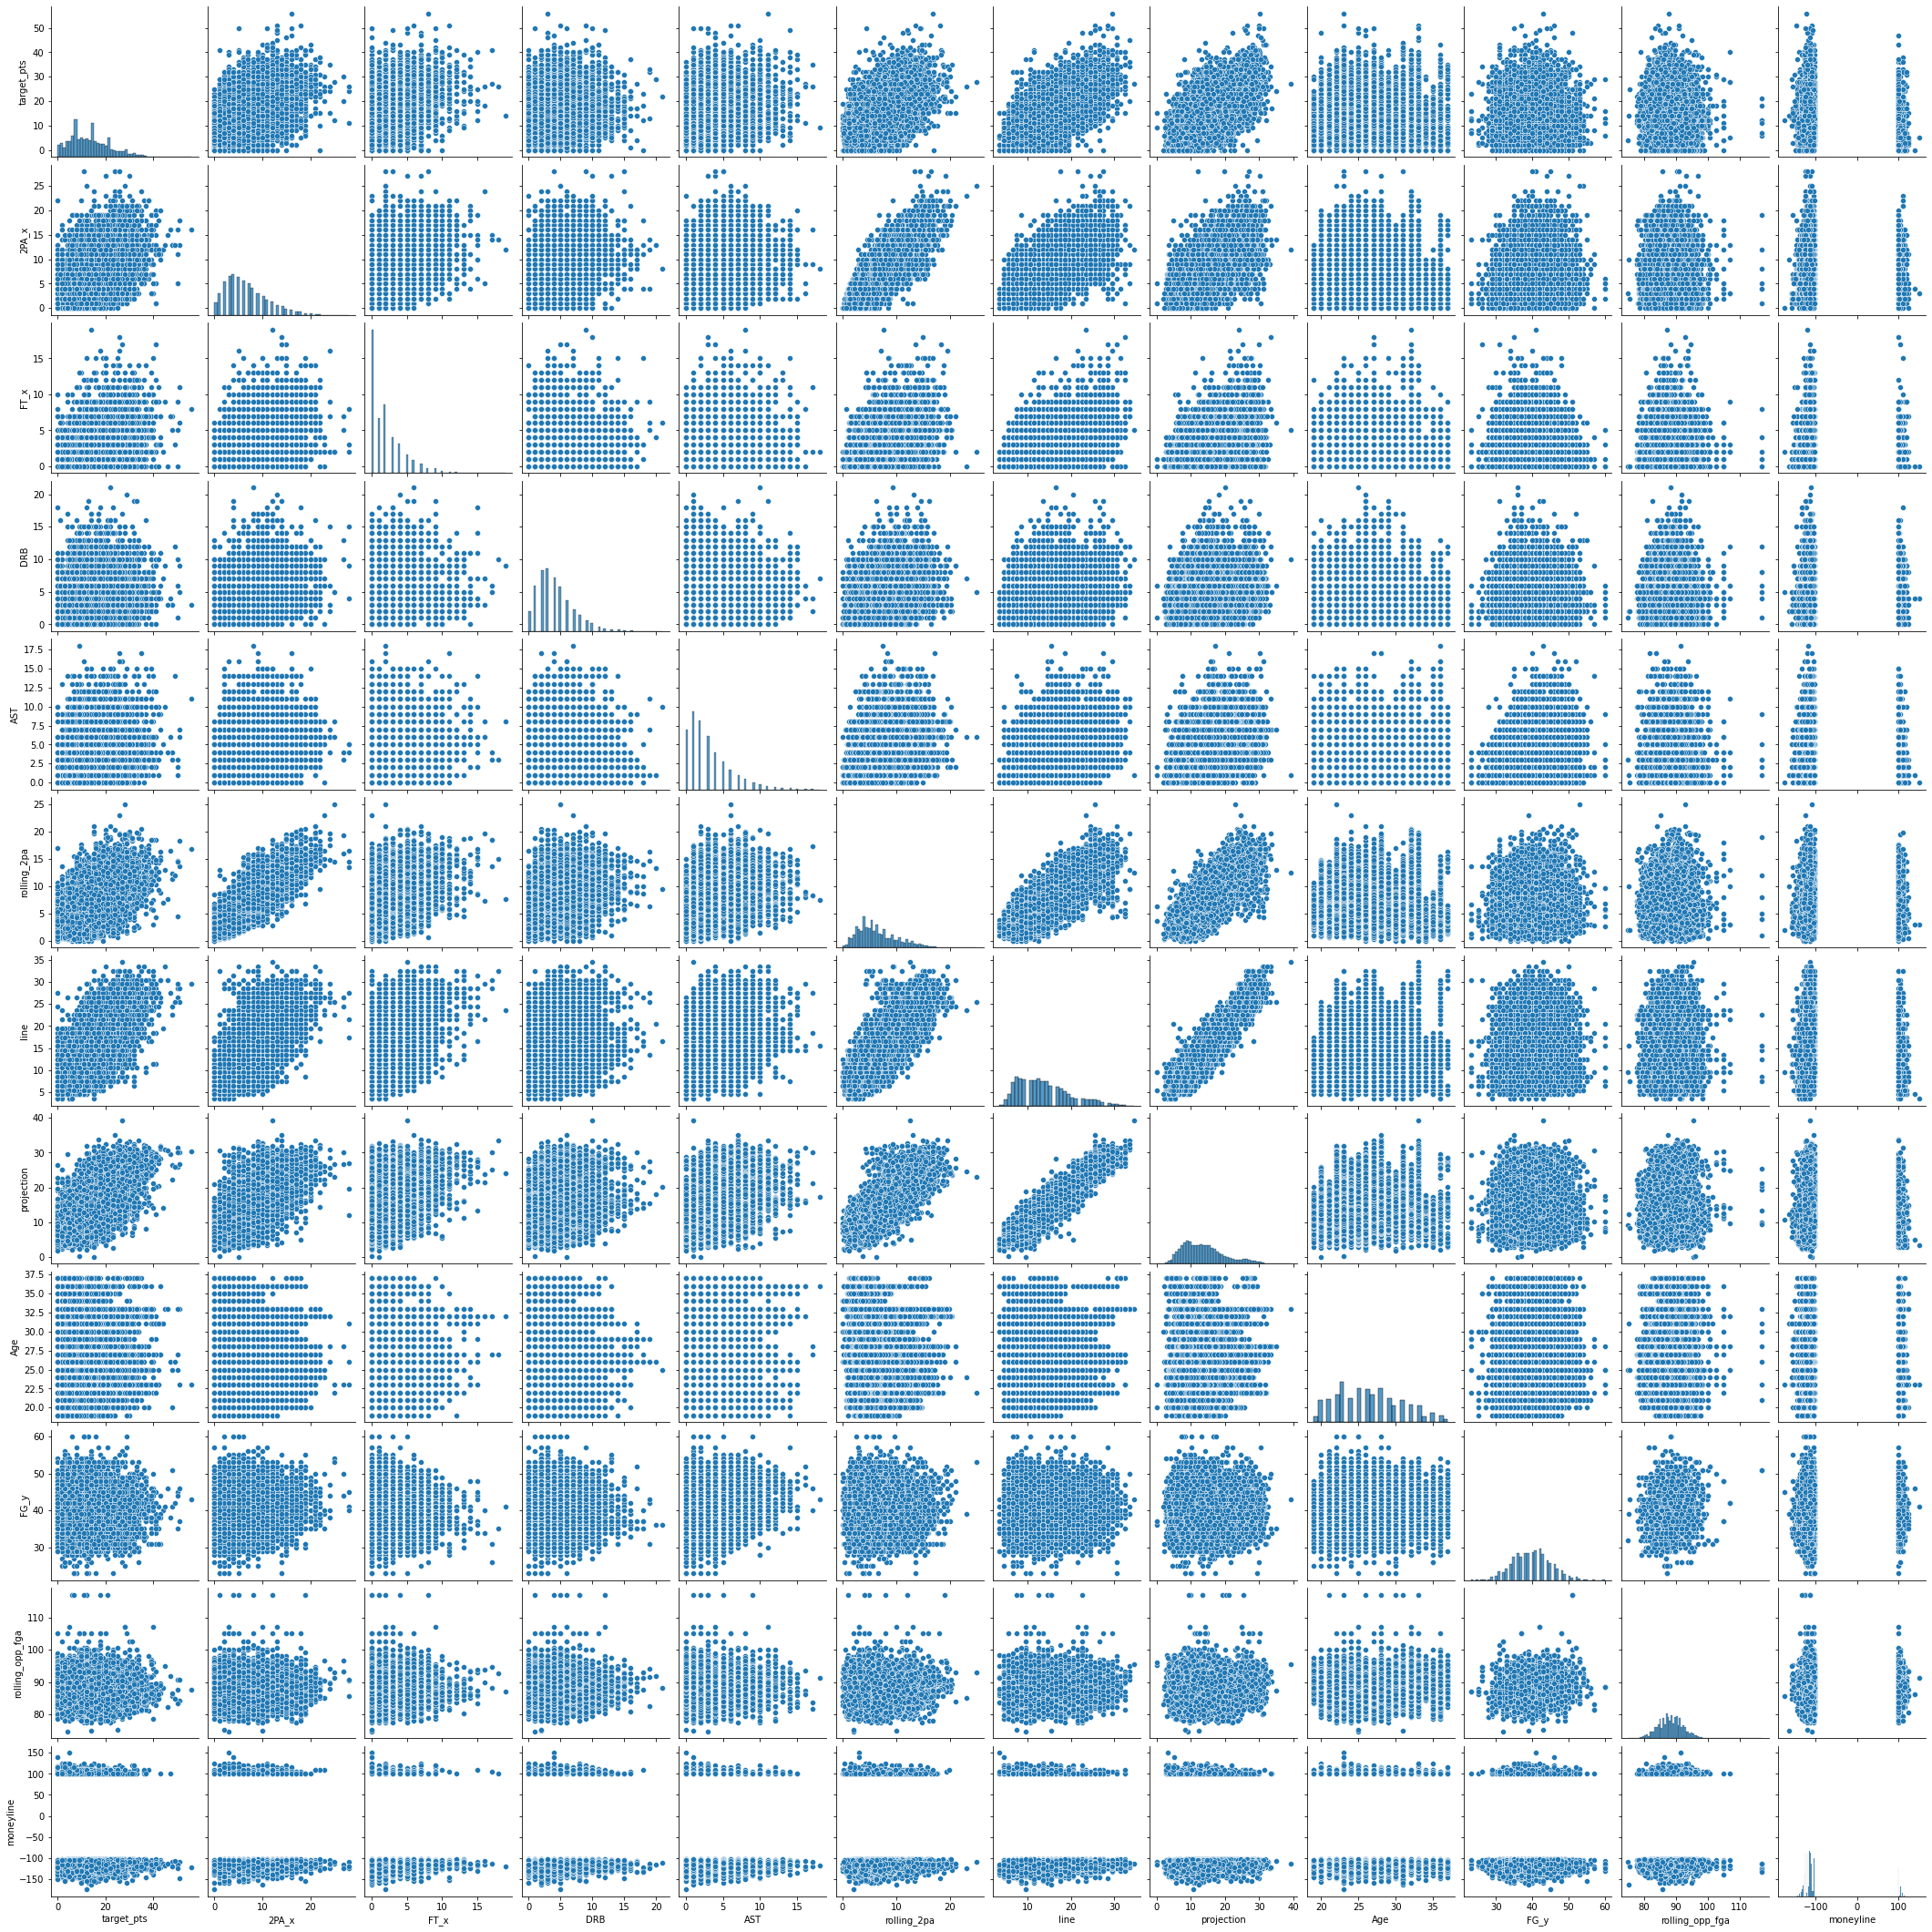

In [21]:
sns.pairplot(numeric_df)

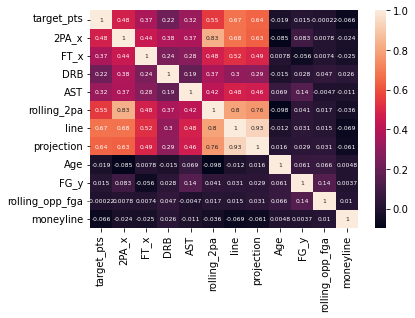

In [22]:
sns.heatmap(numeric_df.corr(), annot=True, annot_kws={"fontsize":6});

In [23]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target_pts       8676 non-null   float64
 1   2PA_x            8676 non-null   float64
 2   FT_x             8676 non-null   float64
 3   DRB              8676 non-null   float64
 4   AST              8676 non-null   float64
 5   rolling_2pa      8676 non-null   float64
 6   line             8676 non-null   float64
 7   projection       8676 non-null   float64
 8   Age              8676 non-null   float64
 9   FG_y             8676 non-null   float64
 10  rolling_opp_fga  8676 non-null   float64
 11  moneyline        8676 non-null   float64
dtypes: float64(12)
memory usage: 813.5 KB


In [24]:
numeric_df.describe()

target_pts        2PA_x         FT_x          DRB          AST  \
count  8676.000000  8676.000000  8676.000000  8676.000000  8676.000000   
mean     13.519479     6.585639     2.067658     4.119295     3.032734   
std       8.366695     4.417301     2.471586     2.890141     2.775992   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.000000     3.000000     0.000000     2.000000     1.000000   
50%      12.000000     6.000000     1.000000     4.000000     2.000000   
75%      19.000000     9.000000     3.000000     6.000000     4.000000   
max      56.000000    28.000000    19.000000    21.000000    18.000000   

       rolling_2pa         line   projection          Age         FG_y  \
count  8676.000000  8676.000000  8676.000000  8676.000000  8676.000000   
mean      6.528329    13.635201    13.709865    26.476602    40.011641   
std       3.705004     5.867847     6.076928     4.297741     5.123645   
min       0.000000     3.500000     0.020000    19.000000    23.000000   
25%       3.800000     8.500000     9.030000    23.000000    36.000000   
50%       5.800000    12.500000    12.820000    26.000000    40.000000   
75%       8.666667    17.500000    17.152500    29.000000    43.000000   
max      25.000000    34.500000    39.300000    37.000000    60.000000   

       rolling_opp_fga    moneyline  
count      8676.000000  8676.000000  
mean         88.341801   -91.701130  
std           4.009812    70.759343  
min          74.800000  -175.000000  
25%          85.600000  -122.000000  
50%          88.200000  -115.000000  
75%          91.000000  -107.000000  
max         117.000000   150.000000

In [25]:
X, y = df3.drop(columns='target_pts'), df3.target_pts

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=3)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)

In [28]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
print('R2 Score for Simple Linear Regression on Training Set using selected features: ' + str(linear_reg.score(X_train, y_train)))

R2 Score for Simple Linear Regression on Training Set using selected features: 0.4629341635354026


In [30]:
val_set_preds = linear_reg.predict(X_val)

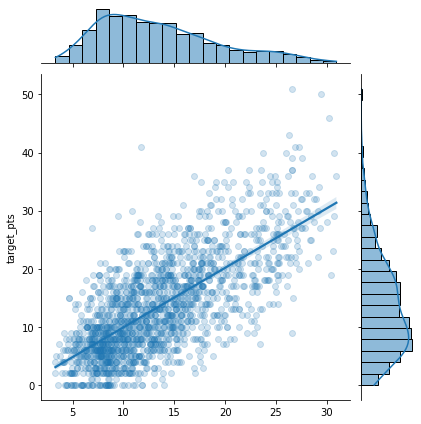

In [31]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [32]:
print('R2 for Linear Regression model on validation set: ' + str(linear_reg.score(X_val, y_val)))

R2 for Linear Regression model on validation set: 0.49740598073164477


In [33]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Linear Regression model on validation set: ' + str(mae))

Mean absolute error for Linear Regression model on validation set: 4.712166960278455


In [34]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for Linear Regression model on validation set: ' + str(rmse))

Root mean squared error for Linear Regression model on validation set: 5.966360168385235


In [35]:
linear_reg.fit(X_train_val, y_train_val)

LinearRegression()

In [36]:
print('R2 for Linear Regression model on train/validation set: ' + str(linear_reg.score(X_train_val, y_train_val)))

R2 for Linear Regression model on train/validation set: 0.472334289210789


In [37]:
print('R2 for Linear Regression model on test set: ' + str(linear_reg.score(X_test, y_test)))

R2 for Linear Regression model on test set: 0.43833626708173323


In [38]:
test_set_preds = linear_reg.predict(X_test)

In [39]:
rmse = mean_squared_error(y_test, test_set_preds, squared=False)
print('Root mean squared error for Linear Regression model on test set: ' + str(rmse))

Root mean squared error for Linear Regression model on test set: 6.215043114838097


In [40]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Linear Regression model on test set: ' + str(mae))

Mean absolute error for Linear Regression model on test set: 4.712166960278455


In [41]:
poly = PolynomialFeatures(degree=2)

In [42]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)

In [44]:
X_train_poly = poly.fit_transform(X_train)

In [45]:
X_val_poly = poly.transform(X_val)

In [46]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [47]:
print('R2 Score for Polynomial Linear Regression using training set: ' + str(lr_poly.score(X_train_poly, y_train)))

R2 Score for Polynomial Linear Regression using training set: 0.5009807064810261


In [48]:
import scipy.stats as stats

In [49]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

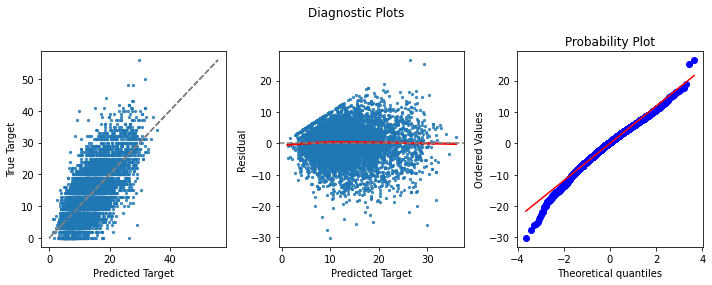

In [50]:
diagnostic_plots(lr_poly.predict(X_train_poly), y_train)

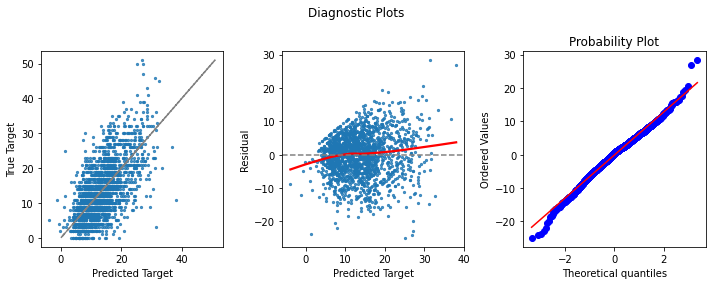

In [51]:
diagnostic_plots(lr_poly.predict(X_val_poly), y_val)

In [52]:
print('R2 Score for Polynomial Regression using validation set: ' + str(lr_poly.score(X_val_poly, y_val)))

R2 Score for Polynomial Regression using validation set: 0.4021531609516359


In [53]:
val_set_preds = lr_poly.predict(X_val_poly)

In [54]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Polynomial Regression model on validation set: ' + str(mae))

Mean absolute error for Polynomial Regression model on validation set: 5.0624087909635636


In [55]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for Polynomial Regression model on validation set: ' + str(rmse))

Root mean squared error for Polynomial Regression model on validation set: 6.474854887602833


In [56]:
for name, coef in zip(poly.get_feature_names_out(), lr_poly.coef_):
    print(f"{name:<6}: {coef: .3f}")

1     : -0.000
2PA_x : -0.010
FT_x  : -1.817
DRB   : -0.003
AST   : -1.346
rolling_2pa: -1.291
line  :  1.697
projection:  0.977
Age   :  0.023
FG_y  :  0.313
rolling_opp_fga: -0.068
moneyline:  0.005
game_result_W: -1.759
Team_CHA: -6.986
Team_LAC:  5.764
Team_MIA: -8.201
Team_MIN:  3.295
Team_ORL: -7.799
Position_F-G:  0.074
opponent_ATL: -7.709
opponent_BOS:  5.317
opponent_CLE: -9.594
opponent_GSW: -4.895
opponent_LAL:  5.307
opponent_UTH: -2.379
opponent_TOR:  8.068
2PA_x^2: -0.006
2PA_x FT_x:  0.017
2PA_x DRB: -0.006
2PA_x AST:  0.035
2PA_x rolling_2pa:  0.007
2PA_x line: -0.008
2PA_x projection:  0.010
2PA_x Age:  0.009
2PA_x FG_y:  0.006
2PA_x rolling_opp_fga: -0.005
2PA_x moneyline:  0.001
2PA_x game_result_W:  0.056
2PA_x Team_CHA: -0.337
2PA_x Team_LAC:  0.247
2PA_x Team_MIA:  0.041
2PA_x Team_MIN:  0.090
2PA_x Team_ORL:  0.038
2PA_x Position_F-G:  0.356
2PA_x opponent_ATL: -0.281
2PA_x opponent_BOS:  0.090
2PA_x opponent_CLE:  0.215
2PA_x opponent_GSW: -0.311
2PA_x opponent

In [57]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)

In [59]:
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_en = GridSearchCV(ElasticNet(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = 5)
grid_result_en = grid_en.fit(X_train, y_train)


print('Best Score: ', grid_result_en.best_score_)
print('Best Param: ', grid_result_en.best_params_)

Best Score:  -4.8536346671913595
Best Param:  {'alpha': 0.030538555088334154}


In [60]:
elastic_cv = ElasticNetCV(alphas = [0.0021544346900318843], cv=5, random_state=0);
elastic_cv.fit(X_train, y_train)
print('ElasticNet Mean R Squared Score on training data: ', elastic_cv.score(X_train, y_train))

ElasticNet Mean R Squared Score on training data:  0.47393669547503026


In [61]:
print('ElasticNet Mean R Squared Score on validation data: ', elastic_cv.score(X_val, y_val))

ElasticNet Mean R Squared Score on validation data:  0.448426313073472


In [62]:
val_set_preds = elastic_cv.predict(X_val)

In [63]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for ElasticNet model on validation set: ' + str(mae))

Mean absolute error for ElasticNet model on validation set: 4.7279943955568


In [64]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for ElasticNet model on validation set: ' + str(rmse))

Root mean squared error for ElasticNet model on validation set: 6.0523703973334735


In [65]:
for col, coef in zip(X_test.columns, elastic_cv.coef_):
    print(f"{col:<16}: {coef:>12,.7f}")

2PA_x           :    0.1121816
FT_x            :    0.0552650
DRB             :   -0.0202670
AST             :   -0.0159058
rolling_2pa     :   -0.0290886
line            :    0.7974572
projection      :    0.1411831
Age             :   -0.0309070
FG_y            :   -0.0051606
rolling_opp_fga :   -0.0302044
moneyline       :   -0.0027062
game_result_W   :    1.2632477
Team_CHA        :    0.5892140
Team_LAC        :    0.1834591
Team_MIA        :   -0.0429171
Team_MIN        :    0.2092874
Team_ORL        :    0.5825426
Position_F-G    :    0.7196054
opponent_ATL    :    0.7483572
opponent_BOS    :    0.7662642
opponent_CLE    :   -0.8979130
opponent_GSW    :   -0.5329433
opponent_LAL    :    0.5599524
opponent_UTH    :    0.2102379
opponent_TOR    :   -0.1418221


In [66]:
lr_preds = linear_reg.predict(X); lr_preds

array([12.00708969, 15.31743647, 12.93202647, ...,  8.48044963,
        9.61776557,  9.84596447])

In [67]:
df['Model Predictions'] = lr_preds; df

Age   GS  MP_x  FG_x  FGA_x  2P_x  2PA_x  3P_x  \
Name            Date                                                          
 Bogdan         2021-10-21  29.0  1.0  26.0   4.0    8.0   1.0    3.0   3.0   
                2021-10-23  29.0  1.0  27.0   2.0    7.0   1.0    4.0   1.0   
                2021-10-25  29.0  1.0  25.0   5.0    9.0   3.0    3.0   2.0   
                2021-10-27  29.0  1.0  31.0   4.0   12.0   2.0    6.0   2.0   
                2021-10-28  29.0  1.0  34.0   6.0   11.0   5.0    7.0   1.0   
...                          ...  ...   ...   ...    ...   ...    ...   ...   
Ziaire Williams 2021-11-22  20.0  0.0  29.0   3.0    6.0   2.0    3.0   1.0   
                2022-01-09  20.0  1.0  27.0   4.0    9.0   3.0    5.0   1.0   
                2022-01-17  20.0  1.0  18.0   0.0    4.0   0.0    1.0   0.0   
                2022-01-19  20.0  1.0  33.0   4.0   11.0   3.0    4.0   1.0   
                2022-01-21  20.0  1.0  31.0   6.0    8.0   4.0    5.0   2.0   

                            3PA_x  FT_x  FTA_x    TS%  ORB  DRB  TRB  AST  \
Name            Date                                                        
 Bogdan         2021-10-21    5.0   0.0    0.0  0.688  0.0  3.0  3.0  2.0   
                2021-10-23    3.0   0.0    0.0  0.357  0.0  2.0  2.0  2.0   
                2021-10-25    6.0   2.0    2.0  0.709  1.0  2.0  3.0  1.0   
                2021-10-27    6.0   2.0    2.0  0.466  1.0  2.0  3.0  3.0   
                2021-10-28    4.0   1.0    1.0  0.612  0.0  6.0  6.0  4.0   
...                           ...   ...    ...    ...  ...  ...  ...  ...   
Ziaire Williams 2021-11-22    3.0   1.0    2.0  0.581  0.0  4.0  4.0  1.0   
                2022-01-09    4.0   0.0    0.0  0.500  0.0  2.0  2.0  3.0   
                2022-01-17    3.0   2.0    2.0  0.205  0.0  3.0  3.0  1.0   
                2022-01-19    7.0   1.0    1.0  0.437  0.0  1.0  1.0  1.0   
                2022-01-21    3.0   3.0    4.0  0.871  1.0  4.0  5.0  0.0   

                            STL  BLK  TOV   PF  PTS_x  GmSc   BPM  FG_y  \
Name            Date                                                      
 Bogdan         2021-10-21  2.0  0.0  2.0  3.0   11.0   8.1   2.8  45.0   
                2021-10-23  0.0  0.0  0.0  2.0    5.0   2.1  -5.6  38.0   
                2021-10-25  0.0  0.0  0.0  1.0   14.0  11.3   1.9  46.0   
                2021-10-27  0.0  1.0  0.0  2.0   12.0   8.5   0.3  40.0   
                2021-10-28  1.0  0.0  0.0  5.0   14.0  12.3   0.1  48.0   
...                         ...  ...  ...  ...    ...   ...   ...   ...   
Ziaire Williams 2021-11-22  0.0  0.0  0.0  2.0    8.0   5.7  -4.7  42.0   
                2022-01-09  1.0  0.0  1.0  4.0    9.0   5.4  -7.3  47.0   
                2022-01-17  0.0  0.0  2.0  2.0    2.0  -2.0 -17.9  47.0   
                2022-01-19  1.0  0.0  0.0  1.0   10.0   5.5  -6.3  44.0   
                2022-01-21  2.0  1.0  0.0  4.0   17.0  16.4   8.1  43.0   

                            FGA_y  2P_y  2PA_y  3P_y  3PA_y  FT_y  FTA_y  \
Name            Date                                                       
 Bogdan         2021-10-21   94.0  30.0   59.0  15.0   35.0   8.0    9.0   
                2021-10-23   99.0  28.0   65.0  10.0   34.0   9.0   15.0   
                2021-10-25   90.0  34.0   58.0  12.0   32.0  18.0   21.0   
                2021-10-27   96.0  32.0   66.0   8.0   30.0  14.0   17.0   
                2021-10-28   88.0  42.0   67.0   6.0   21.0   9.0   14.0   
...                           ...   ...    ...   ...    ...   ...    ...   
Ziaire Williams 2021-11-22   95.0  29.0   60.0  13.0   35.0  22.0   27.0   
                2022-01-09   86.0  36.0   56.0  11.0   30.0  22.0   32.0   
                2022-01-17   92.0  37.0   67.0  10.0   25.0  15.0   20.0   
                2022-01-19  106.0  35.0   66.0   9.0   40.0  17.0   25.0   
                2022-01-21   82.0  32.0   57.0  11.0   25.0  25.0   40.0   

                            PTS_y 

In [68]:
# Determine if website pick was a win or loss (for fun, potential spinoff angle).
conditions = [
    ((df['Model Predictions'] < df['line']) & (df['target_pts'] < df['line'])),
    ((df['Model Predictions'] < df['line']) & (df['target_pts'] > df['line'])),
    ((df['Model Predictions'] > df['line']) & (df['target_pts'] > df['line'])),
    ((df['Model Predictions'] > df['line']) & (df['target_pts'] < df['line']))
    ]

# create a list of the values we want to assign for each condition
values = [1, 0, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['model_successful_pick'] = np.select(conditions, values)

In [69]:
df

Age   GS  MP_x  FG_x  FGA_x  2P_x  2PA_x  3P_x  \
Name            Date                                                          
 Bogdan         2021-10-21  29.0  1.0  26.0   4.0    8.0   1.0    3.0   3.0   
                2021-10-23  29.0  1.0  27.0   2.0    7.0   1.0    4.0   1.0   
                2021-10-25  29.0  1.0  25.0   5.0    9.0   3.0    3.0   2.0   
                2021-10-27  29.0  1.0  31.0   4.0   12.0   2.0    6.0   2.0   
                2021-10-28  29.0  1.0  34.0   6.0   11.0   5.0    7.0   1.0   
...                          ...  ...   ...   ...    ...   ...    ...   ...   
Ziaire Williams 2021-11-22  20.0  0.0  29.0   3.0    6.0   2.0    3.0   1.0   
                2022-01-09  20.0  1.0  27.0   4.0    9.0   3.0    5.0   1.0   
                2022-01-17  20.0  1.0  18.0   0.0    4.0   0.0    1.0   0.0   
                2022-01-19  20.0  1.0  33.0   4.0   11.0   3.0    4.0   1.0   
                2022-01-21  20.0  1.0  31.0   6.0    8.0   4.0    5.0   2.0   

                            3PA_x  FT_x  FTA_x    TS%  ORB  DRB  TRB  AST  \
Name            Date                                                        
 Bogdan         2021-10-21    5.0   0.0    0.0  0.688  0.0  3.0  3.0  2.0   
                2021-10-23    3.0   0.0    0.0  0.357  0.0  2.0  2.0  2.0   
                2021-10-25    6.0   2.0    2.0  0.709  1.0  2.0  3.0  1.0   
                2021-10-27    6.0   2.0    2.0  0.466  1.0  2.0  3.0  3.0   
                2021-10-28    4.0   1.0    1.0  0.612  0.0  6.0  6.0  4.0   
...                           ...   ...    ...    ...  ...  ...  ...  ...   
Ziaire Williams 2021-11-22    3.0   1.0    2.0  0.581  0.0  4.0  4.0  1.0   
                2022-01-09    4.0   0.0    0.0  0.500  0.0  2.0  2.0  3.0   
                2022-01-17    3.0   2.0    2.0  0.205  0.0  3.0  3.0  1.0   
                2022-01-19    7.0   1.0    1.0  0.437  0.0  1.0  1.0  1.0   
                2022-01-21    3.0   3.0    4.0  0.871  1.0  4.0  5.0  0.0   

                            STL  BLK  TOV   PF  PTS_x  GmSc   BPM  FG_y  \
Name            Date                                                      
 Bogdan         2021-10-21  2.0  0.0  2.0  3.0   11.0   8.1   2.8  45.0   
                2021-10-23  0.0  0.0  0.0  2.0    5.0   2.1  -5.6  38.0   
                2021-10-25  0.0  0.0  0.0  1.0   14.0  11.3   1.9  46.0   
                2021-10-27  0.0  1.0  0.0  2.0   12.0   8.5   0.3  40.0   
                2021-10-28  1.0  0.0  0.0  5.0   14.0  12.3   0.1  48.0   
...                         ...  ...  ...  ...    ...   ...   ...   ...   
Ziaire Williams 2021-11-22  0.0  0.0  0.0  2.0    8.0   5.7  -4.7  42.0   
                2022-01-09  1.0  0.0  1.0  4.0    9.0   5.4  -7.3  47.0   
                2022-01-17  0.0  0.0  2.0  2.0    2.0  -2.0 -17.9  47.0   
                2022-01-19  1.0  0.0  0.0  1.0   10.0   5.5  -6.3  44.0   
                2022-01-21  2.0  1.0  0.0  4.0   17.0  16.4   8.1  43.0   

                            FGA_y  2P_y  2PA_y  3P_y  3PA_y  FT_y  FTA_y  \
Name            Date                                                       
 Bogdan         2021-10-21   94.0  30.0   59.0  15.0   35.0   8.0    9.0   
                2021-10-23   99.0  28.0   65.0  10.0   34.0   9.0   15.0   
                2021-10-25   90.0  34.0   58.0  12.0   32.0  18.0   21.0   
                2021-10-27   96.0  32.0   66.0   8.0   30.0  14.0   17.0   
                2021-10-28   88.0  42.0   67.0   6.0   21.0   9.0   14.0   
...                           ...   ...    ...   ...    ...   ...    ...   
Ziaire Williams 2021-11-22   95.0  29.0   60.0  13.0   35.0  22.0   27.0   
                2022-01-09   86.0  36.0   56.0  11.0   30.0  22.0   32.0   
                2022-01-17   92.0  37.0   67.0  10.0   25.0  15.0   20.0   
                2022-01-19  106.0  35.0   66.0   9.0   40.0  17.0   25.0   
                2022-01-21   82.0  32.0   57.0  11.0   25.0  25.0   40.0   

                            PTS_y 

In [70]:
len(df[df['model_successful_pick'] == 1]) / len(df['model_successful_pick'])

0.5442600276625172

In [71]:
df.sample(20)

Age   GS  MP_x  FG_x  FGA_x  2P_x  2PA_x  3P_x  \
Name             Date                                                          
Royce O'Neale    2021-11-02  28.0  1.0  30.0   1.0    5.0   1.0    1.0   0.0   
Jerami Grant     2021-11-04  27.0  1.0  38.0  11.0   22.0   9.0   16.0   2.0   
Marcus Smart     2021-11-19  27.0  1.0  30.0   9.0   13.0   8.0   11.0   1.0   
Tyler Herro      2022-01-14  21.0  0.0  32.0   7.0   16.0   3.0    8.0   4.0   
Georges Niang    2021-10-30  28.0  0.0  18.0   2.0    7.0   1.0    1.0   1.0   
Dwight Powell    2021-12-12  30.0  1.0  13.0   1.0    3.0   1.0    2.0   0.0   
Anthony Davis    2021-10-24  28.0  1.0  34.0   8.0   15.0   7.0   12.0   1.0   
Clint Capela     2021-11-03  27.0  1.0  33.0   5.0    8.0   5.0    8.0   0.0   
Dennis Schroder  2022-01-21  28.0  1.0  22.0   4.0    9.0   3.0    4.0   1.0   
Alec Burks       2021-12-25  30.0  0.0  18.0   2.0    4.0   1.0    2.0   1.0   
Patrick Beverley 2021-12-08  33.0  1.0  23.0   8.0   11.0   8.0    9.0   0.0   
Jarrett Allen    2021-12-11  23.0  1.0  39.0   5.0    8.0   5.0    7.0   0.0   
Caris LeVert     2022-01-17  27.0  1.0  35.0   9.0   18.0   7.0   12.0   2.0   
Luke Kennard     2021-12-27  25.0  1.0  24.0   3.0    7.0   2.0    3.0   1.0   
Christian Wood   2022-01-14  26.0  1.0  26.0   8.0   15.0   4.0    8.0   4.0   
Domantas Sabonis 2022-01-10  25.0  1.0  45.0   3.0   12.0   3.0   12.0   0.0   
Jaxson Hayes     2022-01-13  21.0  0.0  16.0   5.0    5.0   4.0    4.0   1.0   
Zach LaVine      2021-11-21  26.0  1.0  36.0   7.0   20.0   7.0   15.0   0.0   
LeBron James     2022-01-21  37.0  1.0  34.0  12.0   23.0  10.0   16.0   2.0   
Cade Cunningham  2021-11-04  20.0  1.0  32.0   4.0   17.0   3.0   10.0   1.0   

                             3PA_x  FT_x  FTA_x    TS%  ORB   DRB   TRB   AST  \
Name             Date                                                           
Royce O'Neale    2021-11-02    4.0   0.0    0.0  0.200  2.0   3.0   5.0   2.0   
Jerami Grant     2021-11-04    6.0   3.0    3.0  0.579  0.0   6.0   6.0   4.0   
Marcus Smart     2021-11-19    2.0   3.0    5.0  0.724  3.0   5.0   8.0   6.0   
Tyler Herro      2022-01-14    8.0   6.0    6.0  0.644  0.0   2.0   2.0   3.0   
Georges Niang    2021-10-30    6.0   0.0    0.0  0.357  0.0   3.0   3.0   2.0   
Dwight Powell    2021-12-12    1.0   2.0    2.0  0.515  1.0   3.0   4.0   0.0   
Anthony Davis    2021-10-24    3.0   5.0    7.0  0.608  3.0   5.0   8.0   2.0   
Clint Capela     2021-11-03    0.0   3.0    3.0  0.697  4.0  12.0  16.0   1.0   
Dennis Schroder  2022-01-21    5.0   0.0    0.0  0.500  0.0   2.0   2.0   4.0   
Alec Burks       2021-12-25    2.0   0.0    0.0  0.625  2.0   1.0   3.0   2.0   
Patrick Beverley 2021-12-08    2.0   0.0    1.0  0.699  0.0   2.0   2.0   2.0   
Jarrett Allen    2021-12-11    1.0   9.0   10.0  0.766  2.0   9.0  11.0   1.0   
Caris LeVert     2022-01-17    6.0   6.0    6.0  0.630  0.0   9.0   9.0   4.0   
Luke Kennard     2021-12-27    4.0   3.0    6.0  0.519  0.0   3.0   3.0   0.0   
Christian Wood   2022-01-14    7.0   6.0    6.0  0.737  0.0   8.0   8.0   0.0   
Domantas Sabonis 2022-01-10    0.0   5.0    6.0  0.376  7.0  15.0  22.0  10.0   
Jaxson Hayes     2022-01-13    1.0   2.0    2.0  1.105  3.0   1.0   4.0   0.0   
Zach LaVine      2021-11-21    5.0   7.0    7.0  0.455  0.0   6.0   6.0   4.0   
LeBron James     2022-01-21    7.0   3.0    3.0  0.596  1.0   6.0   7.0   5.0   
Cade Cunningham  2021-11-04    7.0   9.0   10.0  0.421  4.0   6.0  10.0   4.0   

                             STL  BLK  TOV   PF  PTS_x  GmSc   BPM  FG_y  \
Name             Date                                                      
Royce O'Neale    2021-11-02  0.0  0.0  1.0  2.0    2.0   0.8  -6.8  43.0   
Jerami Grant     2021-11-04  1.0  1.0  4.0  1.0   27.0  17.9   3.4  35.0   
Marcus Smart     2021-11-19  1.0  0.0  1.0  2.0   22.0  22.7  11.7  44.0   
Tyler Herro      2022-01-14  0.0  0.0  3.0  2.0   24.0  14.5  -3.0  41.0   
Georges Niang    2021-10-30  0

In [72]:
model_results = df[['target_pts', 'line', 'Model Predictions', 'model_successful_pick']]; model_results

target_pts  line  Model Predictions  \
Name            Date                                              
 Bogdan         2021-10-21         5.0  14.5          12.007090   
                2021-10-23        14.0  15.5          15.317436   
                2021-10-25        12.0  12.5          12.932026   
                2021-10-27        14.0  12.5          12.175297   
                2021-10-28        13.0  12.5          11.964289   
...                                ...   ...                ...   
Ziaire Williams 2021-11-22         9.0   8.5           9.964318   
                2022-01-09         2.0   8.5           8.861838   
                2022-01-17        10.0   9.5           8.480450   
                2022-01-19        17.0   9.5           9.617766   
                2022-01-21         9.0  10.5           9.845964   

                            model_successful_pick  
Name            Date                               
 Bogdan         2021-10-21                      1  
                2021-10-23                      1  
                2021-10-25                      0  
                2021-10-27                      0  
                2021-10-28                      0  
...                                           ...  
Ziaire Williams 2021-11-22                      1  
                2022-01-09                      0  
                2022-01-17                      0  
                2022-01-19                      1  
                2022-01-21                      1  

[8676 rows x 4 columns]

In [73]:
model_results.sample(20)

target_pts  line  Model Predictions  \
Name             Date                                              
Raul Neto        2022-01-11        15.0   7.5           7.728131   
Kyle Anderson    2021-11-20         9.0   9.5           9.835512   
Naz Reid         2021-11-10        12.0   9.5          11.090961   
Garrison Mathews 2021-12-23        23.0  10.5           9.451310   
Alec Burks       2021-12-14         9.0  15.5          16.433384   
DeAndre' Bembry  2021-12-04         4.0   7.5           7.386288   
Evan Mobley      2022-01-22        15.0  16.5          17.020629   
Pat Connaughton  2021-12-02        23.0  12.5          12.883563   
Reggie Bullock   2021-11-03        12.0   8.5           8.629195   
Cody Martin      2021-10-25        12.0   5.5           7.112509   
Grayson Allen    2021-10-27        12.0  12.5          11.495886   
Bradley Beal     2021-10-28        36.0  27.5          28.708150   
Otto Porter      2021-12-23        19.0  12.5          12.784271   
Obi Toppin       2021-10-24         9.0   5.5           5.287322   
Pascal Siakam    2022-01-23        24.0  26.5          26.654654   
Jayson Tatum     2021-10-22        31.0  26.5          26.251283   
Stephen Curry    2021-11-16        40.0  27.5          26.007101   
Bradley Beal     2021-12-08        21.0  23.5          23.518336   
Pat Connaughton  2021-11-07        15.0   9.5           8.858047   
Keifer Sykes     2022-01-08        11.0  12.5          11.506685   

                             model_successful_pick  
Name             Date                               
Raul Neto        2022-01-11                      1  
Kyle Anderson    2021-11-20                      0  
Naz Reid         2021-11-10                      1  
Garrison Mathews 2021-12-23                      0  
Alec Burks       2021-12-14                      0  
DeAndre' Bembry  2021-12-04                      1  
Evan Mobley      2022-01-22                      0  
Pat Connaughton  2021-12-02                      1  
Reggie Bullock   2021-11-03                      1  
Cody Martin      2021-10-25                      1  
Grayson Allen    2021-10-27                      1  
Bradley Beal     2021-10-28                      1  
Otto Porter      2021-12-23                      1  
Obi Toppin       2021-10-24                      0  
Pascal Siakam    2022-01-23                      0  
Jayson Tatum     2021-10-22                      0  
Stephen Curry    2021-11-16                      0  
Bradley Beal     2021-12-08                      0  
Pat Connaughton  2021-11-07                      0  
Keifer Sykes     2022-01-08                      1

In [74]:
model_results_working = model_results

In [75]:
model_results_working['game_date'] = model_results_working.index.get_level_values(1)

/var/folders/36/w8jclnw52p3d1qr2544j3lth0000gn/T/ipykernel_88289/4286117969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_working['game_date'] = model_results_working.index.get_level_values(1)


In [76]:
model_results_working

target_pts  line  Model Predictions  \
Name            Date                                              
 Bogdan         2021-10-21         5.0  14.5          12.007090   
                2021-10-23        14.0  15.5          15.317436   
                2021-10-25        12.0  12.5          12.932026   
                2021-10-27        14.0  12.5          12.175297   
                2021-10-28        13.0  12.5          11.964289   
...                                ...   ...                ...   
Ziaire Williams 2021-11-22         9.0   8.5           9.964318   
                2022-01-09         2.0   8.5           8.861838   
                2022-01-17        10.0   9.5           8.480450   
                2022-01-19        17.0   9.5           9.617766   
                2022-01-21         9.0  10.5           9.845964   

                            model_successful_pick   game_date  
Name            Date                                           
 Bogdan         2021-10-21                      1  2021-10-21  
                2021-10-23                      1  2021-10-23  
                2021-10-25                      0  2021-10-25  
                2021-10-27                      0  2021-10-27  
                2021-10-28                      0  2021-10-28  
...                                           ...         ...  
Ziaire Williams 2021-11-22                      1  2021-11-22  
                2022-01-09                      0  2022-01-09  
                2022-01-17                      0  2022-01-17  
                2022-01-19                      1  2022-01-19  
                2022-01-21                      1  2022-01-21  

[8676 rows x 5 columns]

In [77]:
model_results_working['bet_date'] = model_results_working.groupby(level=0)['game_date'].shift(-1)

/var/folders/36/w8jclnw52p3d1qr2544j3lth0000gn/T/ipykernel_88289/364420827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_working['bet_date'] = model_results_working.groupby(level=0)['game_date'].shift(-1)


In [78]:
model_results_working = model_results_working.reset_index()

In [79]:
model_results_working[model_results_working['Name'] == 'Joel Embiid']

Name        Date  target_pts  line  Model Predictions  \
4353  Joel Embiid  2021-10-20        22.0  27.5          27.427892   
4354  Joel Embiid  2021-10-24        14.0  24.5          23.161170   
4355  Joel Embiid  2021-10-26        19.0  25.5          26.780176   
4356  Joel Embiid  2021-10-30        18.0  26.5          27.021945   
4357  Joel Embiid  2021-11-03        19.0  25.5          25.783066   
4358  Joel Embiid  2021-11-04        30.0  25.5          26.625168   
4359  Joel Embiid  2021-11-06        16.0  24.5          25.068487   
4360  Joel Embiid  2021-11-29        13.0  23.5          23.536125   
4361  Joel Embiid  2021-12-01        28.0  23.5          25.612628   
4362  Joel Embiid  2021-12-03        43.0  26.5          28.084068   
4363  Joel Embiid  2021-12-06        32.0  27.5          28.943806   
4364  Joel Embiid  2021-12-08        19.0  24.5          25.174932   
4365  Joel Embiid  2021-12-09        26.0  25.5          24.952566   
4366  Joel Embiid  2021-12-11        17.0  23.5          23.291112   
4367  Joel Embiid  2021-12-15        32.0  25.5          24.498160   
4368  Joel Embiid  2021-12-16        41.0  29.5          30.543386   
4369  Joel Embiid  2021-12-20        23.0  26.5          27.618502   
4370  Joel Embiid  2021-12-23        36.0  27.5          28.666038   
4371  Joel Embiid  2021-12-26        36.0  27.5          28.123475   
4372  Joel Embiid  2021-12-28        34.0  26.5          27.501027   
4373  Joel Embiid  2021-12-30        31.0  27.5          28.241043   
4374  Joel Embiid  2022-01-03        31.0  28.5          28.713206   
4375  Joel Embiid  2022-01-05        31.0  29.5          30.003142   
4376  Joel Embiid  2022-01-07        31.0  29.5          30.667706   
4377  Joel Embiid  2022-01-10        31.0  31.5          30.198180   
4378  Joel Embiid  2022-01-12        25.0  28.5          28.984765   
4379  Joel Embiid  2022-01-14        32.0  27.5          27.273763   
4380  Joel Embiid  2022-01-15        32.0  29.5          29.078950   
4381  Joel Embiid  2022-01-17        50.0  28.5          29.675312   
4382  Joel Embiid  2022-01-19        40.0  31.5          31.027290   
4383  Joel Embiid  2022-01-21        38.0  32.5          32.604304   

      model_successful_pick   game_date    bet_date  
4353                      1  2021-10-20  2021-10-24  
4354                      1  2021-10-24  2021-10-26  
4355                      0  2021-10-26  2021-10-30  
4356                      0  2021-10-30  2021-11-03  
4357                      0  2021-11-03  2021-11-04  
4358                      1  2021-11-04  2021-11-06  
4359                      0  2021-11-06  2021-11-29  
4360                      0  2021-11-29  2021-12-01  
4361                      1  2021-12-01  2021-12-03  
4362                      1  2021-12-03  2021-12-06  
4363                      1  2021-12-06  2021-12-08  
4364                      0  2021-12-08  2021-12-09  
4365                      0  2021-12-09  2021-12-11  
4366                      1  2021-12-11  2021-12-15  
4367                      0  2021-12-15  2021-12-16  
4368                      1  2021-12-16  2021-12-20  
4369                      0  2021-12-20  2021-12-23  
4370                      1  2021-12-23  2021-12-26  
4371                      1  2021-12-26  2021-12-28  
4372                      1  2021-12-28  2021-12-30  
4373                      1  2021-12-30  2022-01-03  
4374                      1  2022-01-03  2022-01-05  
4375                      1  2022-01-05  2022-01-07  
4376                      1  2022-01-07  2022-01-10  
4377                      1  2022-01-10  2022-01-12  
4378                      0  2022-01-12  2022-01-14  
4379                      0  2022-01-14  2022-01-15  
4380                      0  2022-01-15  2022-01-17  
4381                      1  2022-01-17  2022-01-19  
4382                      0  2022-01-19  2022-01-21  
4383                      1  2022-01-21         NaN

In [80]:
final_df = model_results_working.copy()

In [81]:
final_df.drop(columns='Date', inplace=True)

In [84]:
final_df[final_df.bet_date == '2022-01-23']

Name  target_pts  line  Model Predictions  \
159            Alec Burks        10.0  13.5          14.249471   
240           Amir Coffey         2.0  10.5          10.109590   
350       Anfernee Simons        19.0  18.5          18.823894   
809           CJ McCollum        19.0  21.5          21.792792   
1951      Dejounte Murray        19.0  19.5          18.320755   
2128        Derrick White        10.0  16.5          15.534763   
2239        Devin Vassell        15.0   9.5           8.880292   
2436  Dorian Finney-Smith         9.0  10.5          10.800433   
2467       Doug McDermott         9.0  10.5           9.652849   
2652         Eric Bledsoe         2.0   7.5           6.874798   
2739        Evan Fournier        14.0  14.5          14.800782   
3087           Gary Trent        13.0  14.5          13.511527   
3432    Immanuel Quickley         8.0  10.5          11.699348   
3561          Ivica Zubac        17.0   7.5           7.634960   
3778         Jakob Poeltl        25.0  12.5          12.156462   
3819        Jalen Brunson        13.0  14.5          15.587453   
4514      Jordan Clarkson         9.0  18.5          16.872825   
4791        Julius Randle        24.0  18.5          18.818978   
4872         Jusuf Nurkic        11.0  16.5          18.168636   
5001       Keldon Johnson        17.0  13.5          12.279600   
5145      Kessler Edwards        15.0   9.5           8.845761   
5415   Kristaps Porzingis        15.0  19.5          20.548980   
5596          LaMelo Ball        19.0  18.5          18.970529   
5766        Lonnie Walker        14.0   9.5           8.438214   
5882          Luka Doncic        37.0  25.5          26.765193   
5917         Luke Kennard        14.0  14.5          13.637308   
6127        Mason Plumlee         6.0   6.5           7.039226   
6201          Maxi Kleber         7.0   7.5           8.584593   
6359        Miles Bridges        19.0  21.5          21.717484   
6471         Monte Morris         4.0  12.5          13.203280   
6760         Nikola Jokic        34.0  25.5          25.705308   
6856           OG Anunoby        11.0  18.5          17.699165   
6995      P.J. Washington        12.0   9.5          10.497779   
7030        Pascal Siakam        28.0  22.5          21.659570   
7138          Patty Mills        21.0  12.5          11.605691   
7196     Precious Achiuwa         3.0   6.5           6.700630   
7264           RJ Barrett        28.0  19.5          19.986654   
7368       Reggie Jackson        26.0  15.5          15.034018   
8090         Terance Mann         9.0   7.5           6.830350   
8171         Terry Rozier         7.0  21.5          21.662511   

      model_successful_pick   game_date    bet_date  
159                       0  2022-01-20  2022-01-23  
240                       1  2022-01-21  2022-01-23  
350                       1  2022-01-21  2022-01-23  
809                       0  2022-01-21  2022-01-23  
1951                      1  2022-01-21  2022-01-23  
2128                      1  2022-01-21  2022-01-23  
2239                      0  2022-01-21  2022-01-23  
2436                      0  2022-01-20  2022-01-23  
2467                      1  2022-01-21  2022-01-23  
2652                      1  2022-01-13  2022-01-23  
2739                      0  2022-01-20  2022-01-23  
3087                      1  2022-01-07  2022-01-23  
3432                      0  2022-01-20  2022-01-23  
3561                      1  2022-01-21  2022-01-23  
3778                      0  2022-01-21  2022-01-23  
3819                      0  2022-01-20  2022-01-23  
4514                      1  2022-01-21  2022-01-23  
4791                      1  2022-01-20  2022-01-23  
4872                      0  2022-01-21  2022-01-23  
5001                      0  2022-01-19  2022-01-23  
5145                      0  2022-01-21  2022-01-23  
5415                      0  2022-01-20  2022-01-23  
5596                      1  2022-01-21  2022-01-23  
5766              